In [1]:
import sys
from gym_ras.api import make_env
# sys.path.append("../ext/equi-rl-for-pomdps")
# from rgbd_sym.api import make_env
# import argparse
# import numpy as np
# from rgbd_sym.tool.plt import use_backend, plot_img, plot_traj
# import matplotlib.pyplot as plt
# from rgbd_sym.tool.sym import local_sym_step, get_sym_params, generate_sym2, actions2Ts
from gym_ras.tool.depth import get_intrinsic_matrix, projection_matrix_to_K
# import time
# from copy import deepcopy

# size = 84




/home/ben/miniconda3/envs/gasv2_surrol/lib/python3.9/site-packages/dash/_jupyter.py:29: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  _dash_comm = Comm(target_name="dash")


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [5]:
env, env_config = make_env(tags=['domain_random_enhance', 'dsa_occup2','sym'])
obs = env.reset()
proj_matrix = env.get_intrinsic_matrix()
K = projection_matrix_to_K(proj_matrix, image_size=600)
print("K", K)

args = env.sym_args
# generate ground truth trajectory
origin_actions = []
obss_origin = [obs]
done = False
while not done:
    action = env.get_oracle_action()
    origin_actions.append(action)
    obs, reward, done, info = env.step(action)
    obss_origin.append(obs)
args['traj_nums']   = 5 
args['radius_ratio'] = 1
args['height_ratio'] = 1
args['screw_angle'] =  0

stuff_pose_seed: 0
gripper_pose_seed: 4294967295
stuff_pose_seed: 0
gripper_pose_seed: 4294967295
cam_pose_seed: 1
depth_remap_seed: 2
stuff_pose_seed: 0
gripper_pose_seed: 4294967295
cam_pose_seed: 1
depth_remap_seed: 2
image_noise_seed: 30
action_noise_seed: 10


/home/ben/code/robot/gasv2/gym_ras/env/embodied/surrol/env.py:108: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if background_texture_dir is "" else background_texture_dir,
/home/ben/code/robot/gasv2/gym_ras/env/embodied/surrol/env.py:108: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if background_texture_dir is "" else background_texture_dir,


error: GetBasePositionAndOrientation failed.

pybullet build time: Nov 28 2023 23:52:03


robot id None
K [[59.98221231  0.         42.        ]
 [ 0.         59.98221231 42.        ]
 [ 0.          0.          1.        ]]


/home/ben/miniconda3/envs/rgbd-sym/lib/python3.9/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


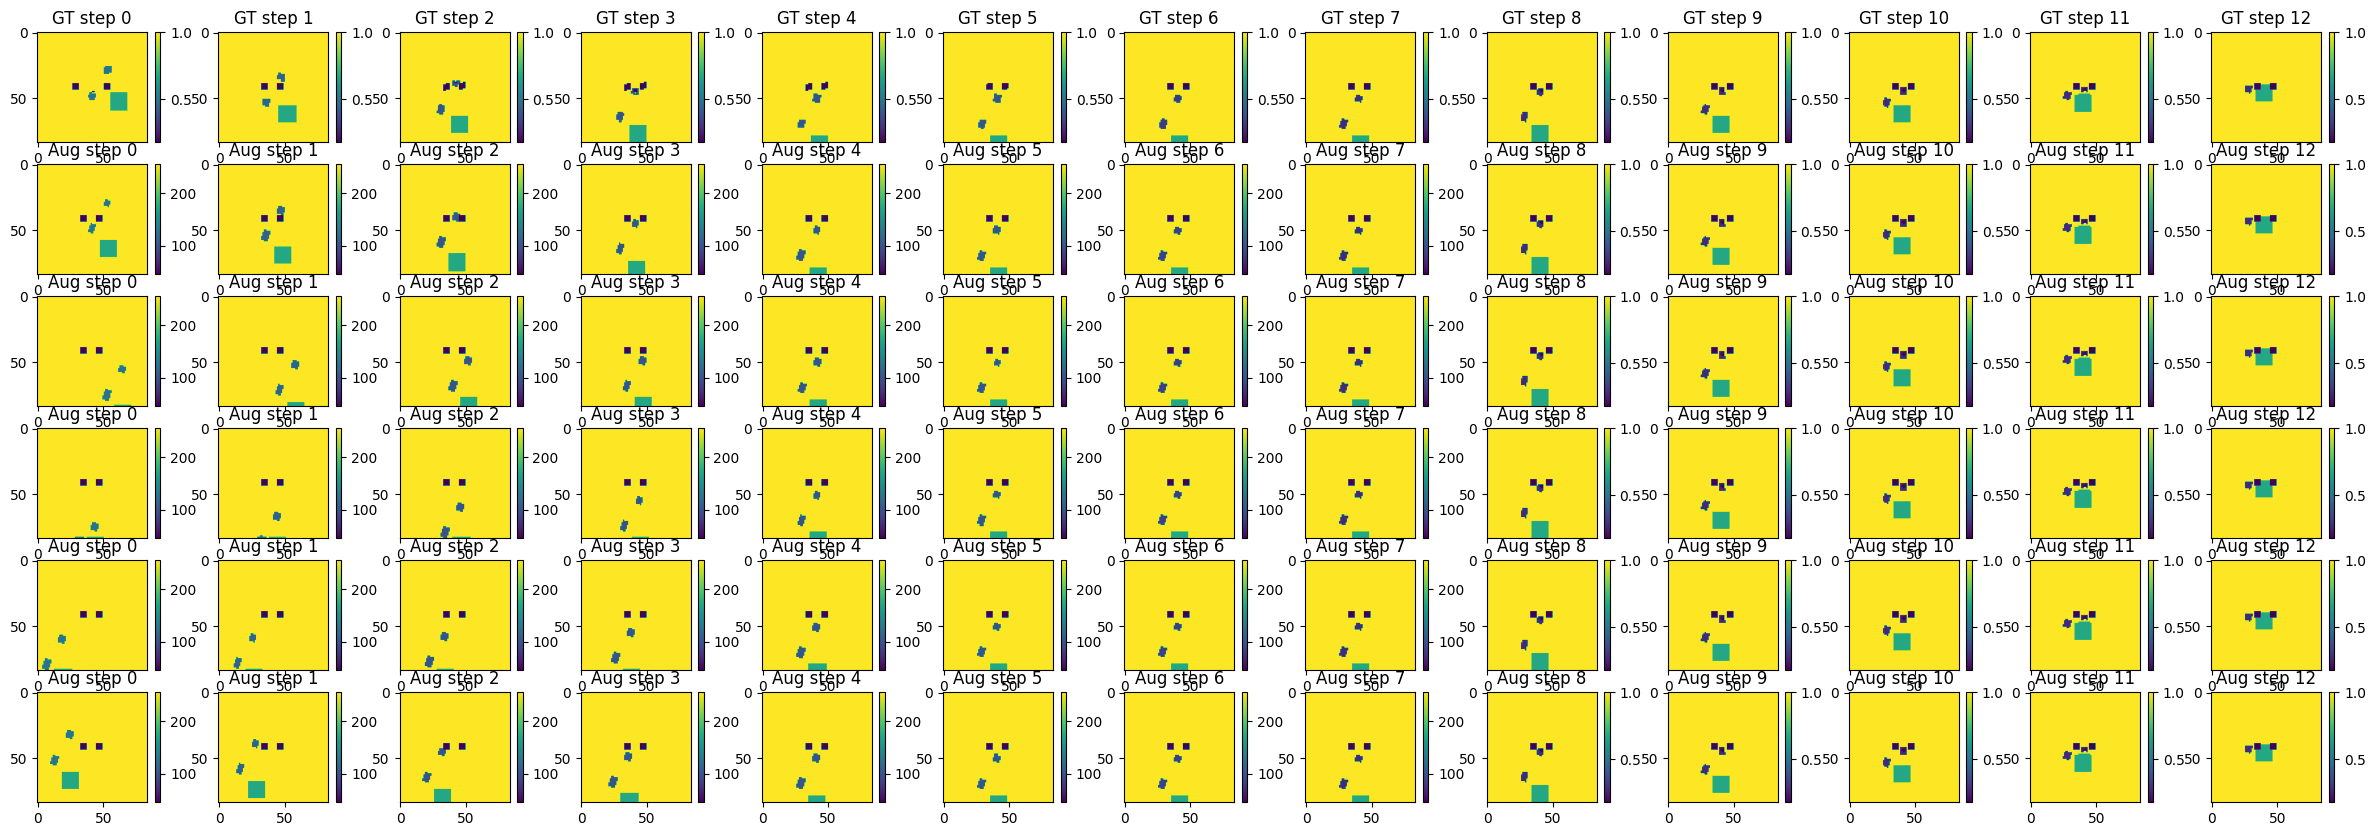

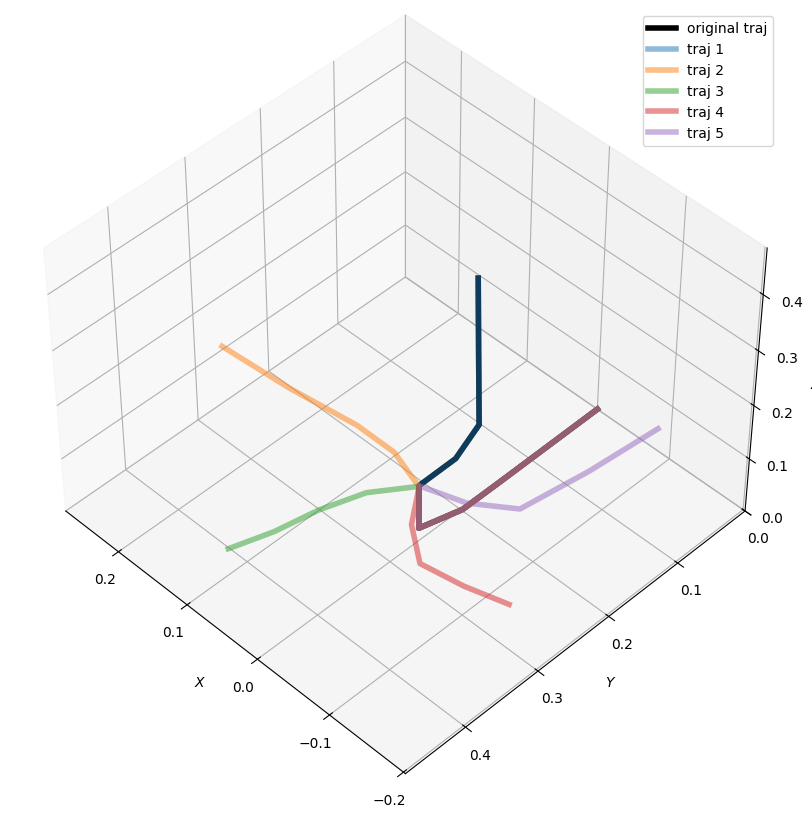

In [2]:
env, env_config = make_env(tags=['block_push'], seed=0)
obs = env.reset()
proj_matrix = env.get_projection_matrix()
K = projection_matrix_to_K(proj_matrix, image_size=size)
print("K", K)

args = env.sym_args
# generate ground truth trajectory
origin_actions = []
obss_origin = [obs]
done = False
while not done:
    action = env.get_oracle_action()
    origin_actions.append(action)
    obs, reward, done, info = env.step(action)
    obss_origin.append(obs)
args['traj_nums']   = 5 
args['radius_ratio'] = 1
args['height_ratio'] = 1
args['screw_angle'] =  0
    
new_obss, new_actionss = generate_sym2(obss_origin, origin_actions, 
              **args)


imgss = []
imgss.append([{"image": v['image'][0,:,:], "title": f"GT step {i}"} for i, v in enumerate(obss_origin)])
for new_obs in new_obss:
    imgss.append([{"image": v['image'][0,:,:], "title": f"Aug step {i}"} for i, v in enumerate(new_obs)])
plt.rcParams['figure.figsize'] = [30, 10]
plot_img(imgss)



points_mats = []
trajTs = actions2Ts(
    [-a for a in reversed(origin_actions)],
    action_delta_pos=args["action_delta_pos"],
    action_delta_rot=args["action_delta_rot"],
)
points_mats = []
pc_mat = {}
pc_mat["mat"] = np.array([[t[0][3], t[1][3], t[2][3]] for t in trajTs])
pc_mat["linewidth"] = 4
pc_mat["alpha"] = 1
pc_mat["label"] = f"original traj"
pc_mat["color"] = "k"
points_mats.append(pc_mat)

for i, new_actions in enumerate(new_actionss):
    new_trajTs = actions2Ts(
    [-a for a in reversed(new_actions)],
    action_delta_pos=args["action_delta_pos"],
    action_delta_rot=args["action_delta_rot"],
    )
    pc_mat = {}
    pc_mat["mat"] = np.array([[t[0][3], t[1][3], t[2][3]] for t in new_trajTs])
    pc_mat["linewidth"] = 4
    pc_mat["alpha"] = 0.5
    pc_mat["label"] = f"traj {i+1}"
    points_mats.append(pc_mat)   
plot_traj(points_mats, elev=45, azim=135, roll=0)

robot id None
K [[59.98221231  0.         42.        ]
 [ 0.         59.98221231 42.        ]
 [ 0.          0.          1.        ]]


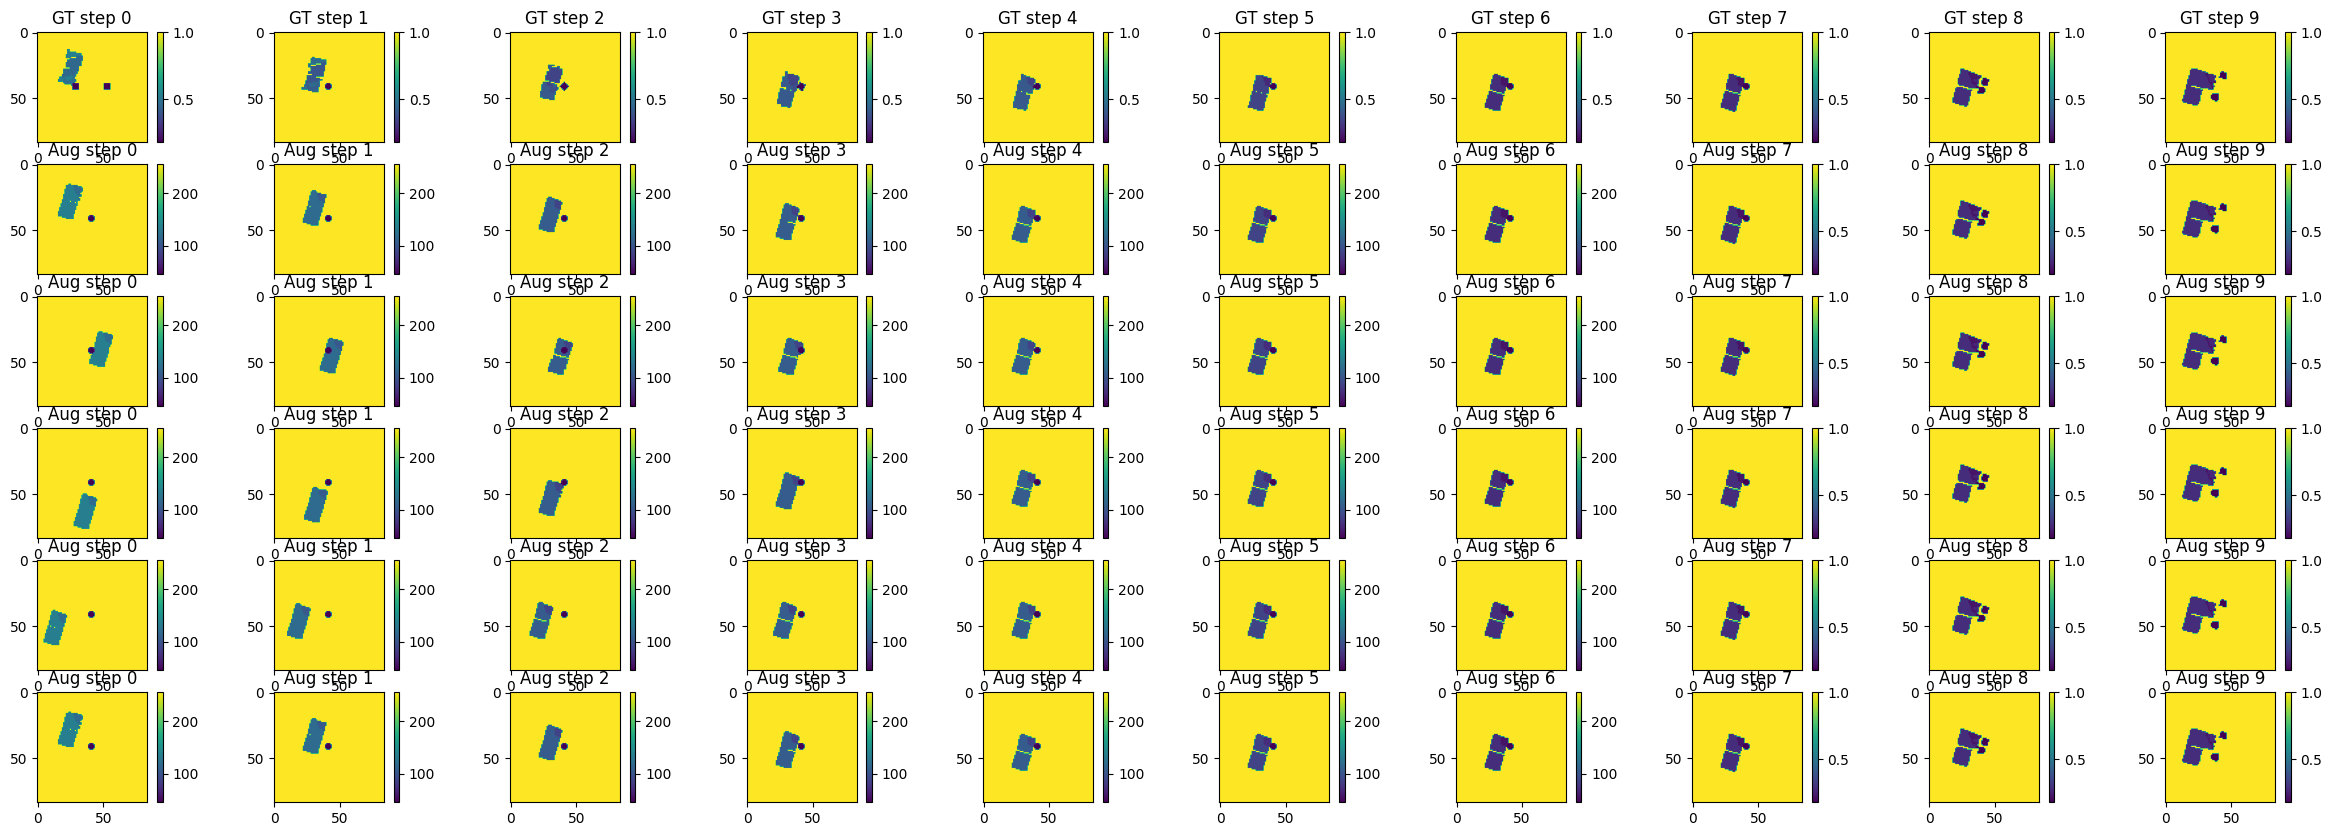

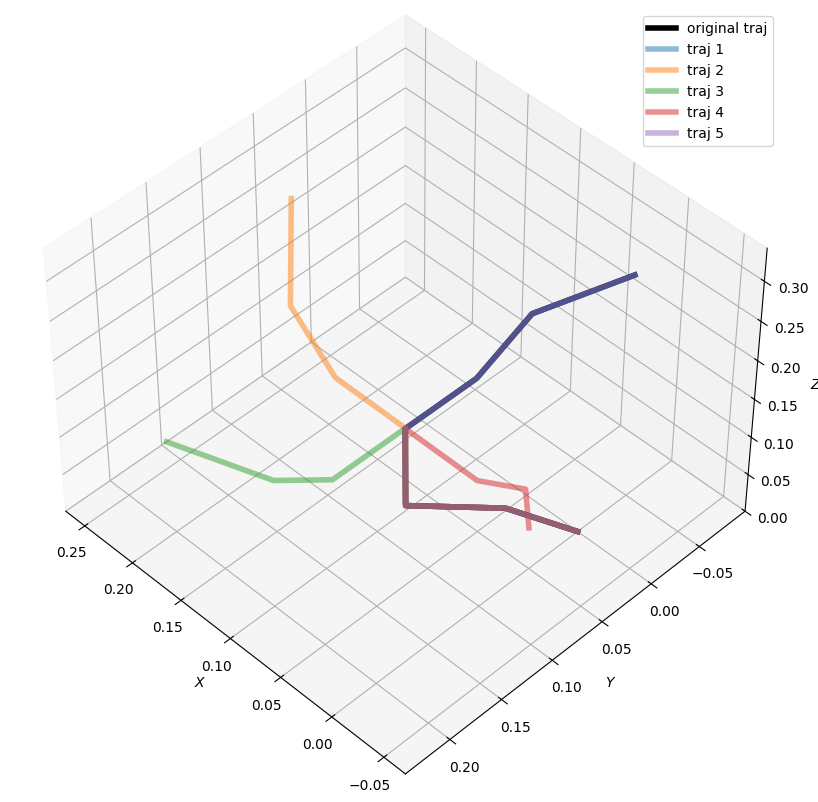

In [3]:
env, env_config = make_env(tags=['drawer_open'], seed=0)
obs = env.reset()
proj_matrix = env.get_projection_matrix()
K = projection_matrix_to_K(proj_matrix, image_size=size)
print("K", K)

args = env.sym_args
# generate ground truth trajectory
origin_actions = []
obss_origin = [obs]
done = False
while not done:
    action = env.get_oracle_action()
    origin_actions.append(action)
    obs, reward, done, info = env.step(action)
    obss_origin.append(obs)
args['traj_nums']   = 5 
args['radius_ratio'] = 1
args['height_ratio'] = 1
args['screw_angle'] =  0
    
new_obss, new_actionss = generate_sym2(obss_origin, origin_actions, 
              **args)


imgss = []
imgss.append([{"image": v['image'][0,:,:], "title": f"GT step {i}"} for i, v in enumerate(obss_origin)])
for new_obs in new_obss:
    imgss.append([{"image": v['image'][0,:,:], "title": f"Aug step {i}"} for i, v in enumerate(new_obs)])
plt.rcParams['figure.figsize'] = [30, 10]
plot_img(imgss)



points_mats = []
trajTs = actions2Ts(
    [-a for a in reversed(origin_actions)],
    action_delta_pos=args["action_delta_pos"],
    action_delta_rot=args["action_delta_rot"],
)
points_mats = []
pc_mat = {}
pc_mat["mat"] = np.array([[t[0][3], t[1][3], t[2][3]] for t in trajTs])
pc_mat["linewidth"] = 4
pc_mat["alpha"] = 1
pc_mat["label"] = f"original traj"
pc_mat["color"] = "k"
points_mats.append(pc_mat)

for i, new_actions in enumerate(new_actionss):
    new_trajTs = actions2Ts(
    [-a for a in reversed(new_actions)],
    action_delta_pos=args["action_delta_pos"],
    action_delta_rot=args["action_delta_rot"],
    )
    pc_mat = {}
    pc_mat["mat"] = np.array([[t[0][3], t[1][3], t[2][3]] for t in new_trajTs])
    pc_mat["linewidth"] = 4
    pc_mat["alpha"] = 0.5
    pc_mat["label"] = f"traj {i+1}"
    points_mats.append(pc_mat)   
plot_traj(points_mats, elev=45, azim=135, roll=0)